In [62]:
import datetime as dt
import json
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline, BSpline, interp1d
import numpy as np

In [39]:
with open("config.json", "r") as config_file:
    config = json.load(config_file)

In [68]:
downloads_dir = "downloads/"

kw_files = os.listdir(downloads_dir)

In [69]:
data = {}
for fname in kw_files:
    with open(os.path.join(downloads_dir, fname), "r") as f:
        keyword = fname.replace(".json", "")
        
        data[keyword] = json.load(f)

In [71]:
BIN_MINUTE = 60
BIN_HOUR = BIN_MINUTE * 60
BIN_DAY = BIN_HOUR * 24
BIN_WEEK = BIN_DAY * 7
BIN_MONTH = BIN_WEEK * 4

In [109]:
def plot_keyword(comments, keyword, smooth=False):
    years = mdates.YearLocator()
    months = mdates.MonthLocator()
    years_fmt = mdates.DateFormatter('%Y')
    months_fmt = mdates.DateFormatter('%b')

    times = [c['created_utc'] for c in comments]
    bin_boundaries = range(start_date, end_date, BIN_MONTH)
    bins, bin_times, _ = plt.hist(times, bins=bin_boundaries)
    bin_times = bin_times[1:] #discard first boundary
    plt.clf() #don't show histogram

    if smooth:
        f = interp1d(bin_times, bins, kind='cubic')
        bin_times = np.linspace(bin_times[0], bin_times[-1], num=300, endpoint=True)
        bins = f(bin_times)
        
    bin_dates = list(map(dt.datetime.fromtimestamp, bin_times))

    fig, ax = plt.subplots(figsize=(7*8/6, 7), dpi=150)
    ax.plot(bin_dates, bins)

    ax.set_title(keyword, fontsize=20, fontweight='bold')

    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)
    ax.xaxis.set_minor_formatter(months_fmt)
    ax.xaxis.set_minor_locator(months)

    ax.set_ylabel("Online Mention Count (In Detected Communities)", fontsize=14)

    fig.autofmt_xdate()

    plt.show()

<Figure size 432x288 with 0 Axes>

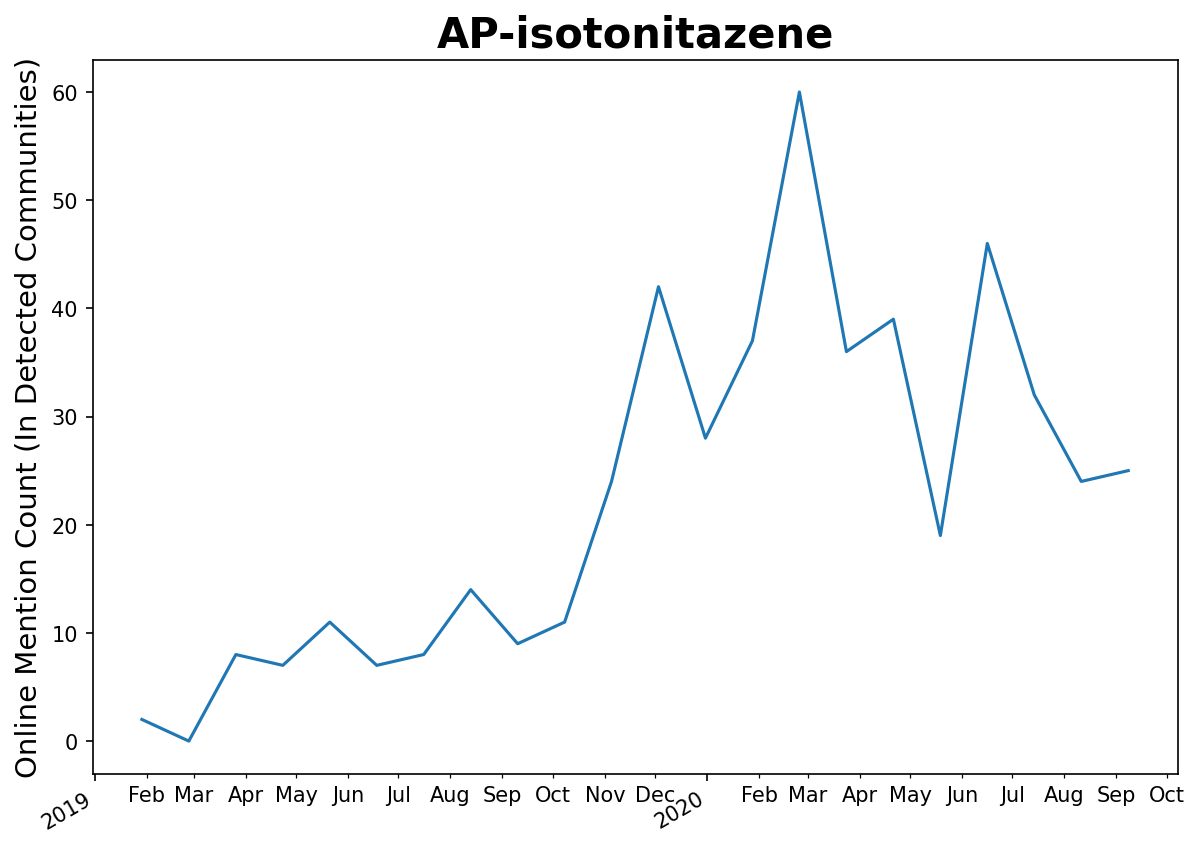

<Figure size 432x288 with 0 Axes>

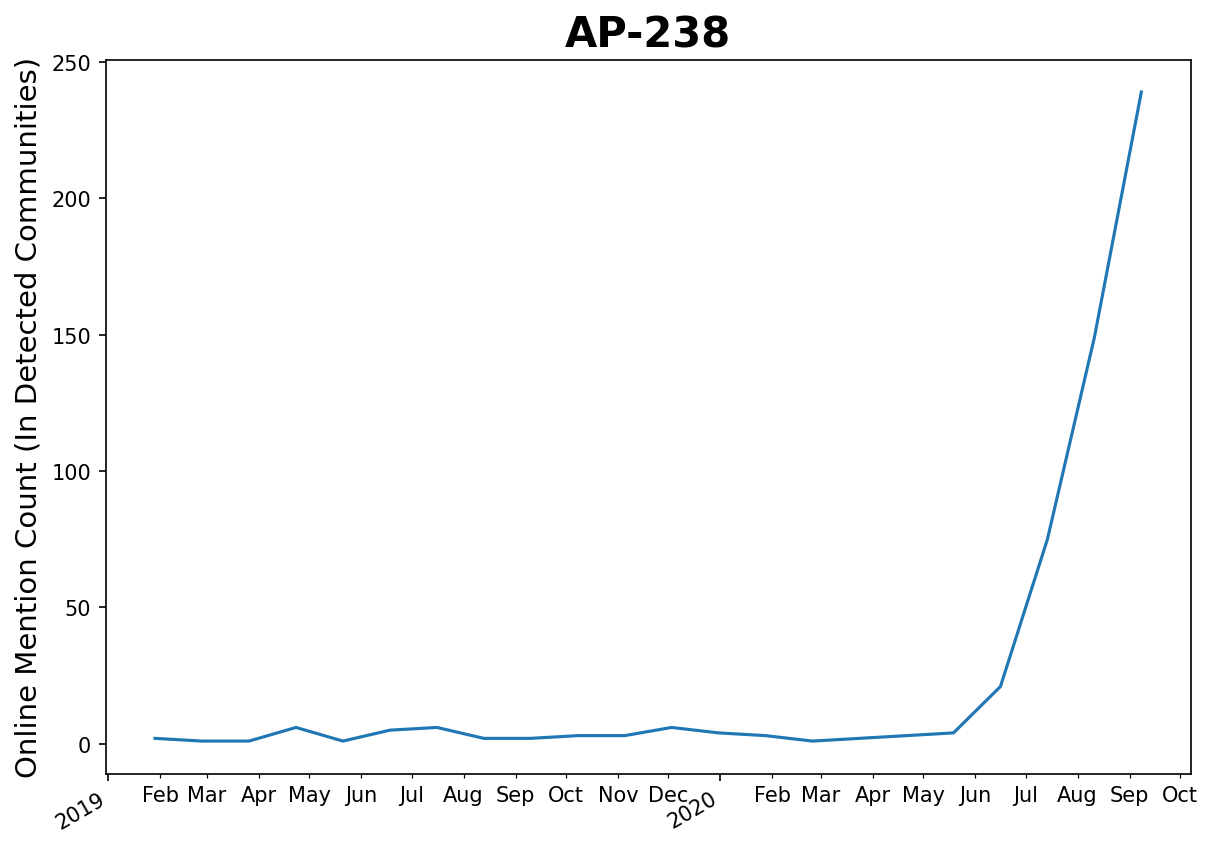

<Figure size 432x288 with 0 Axes>

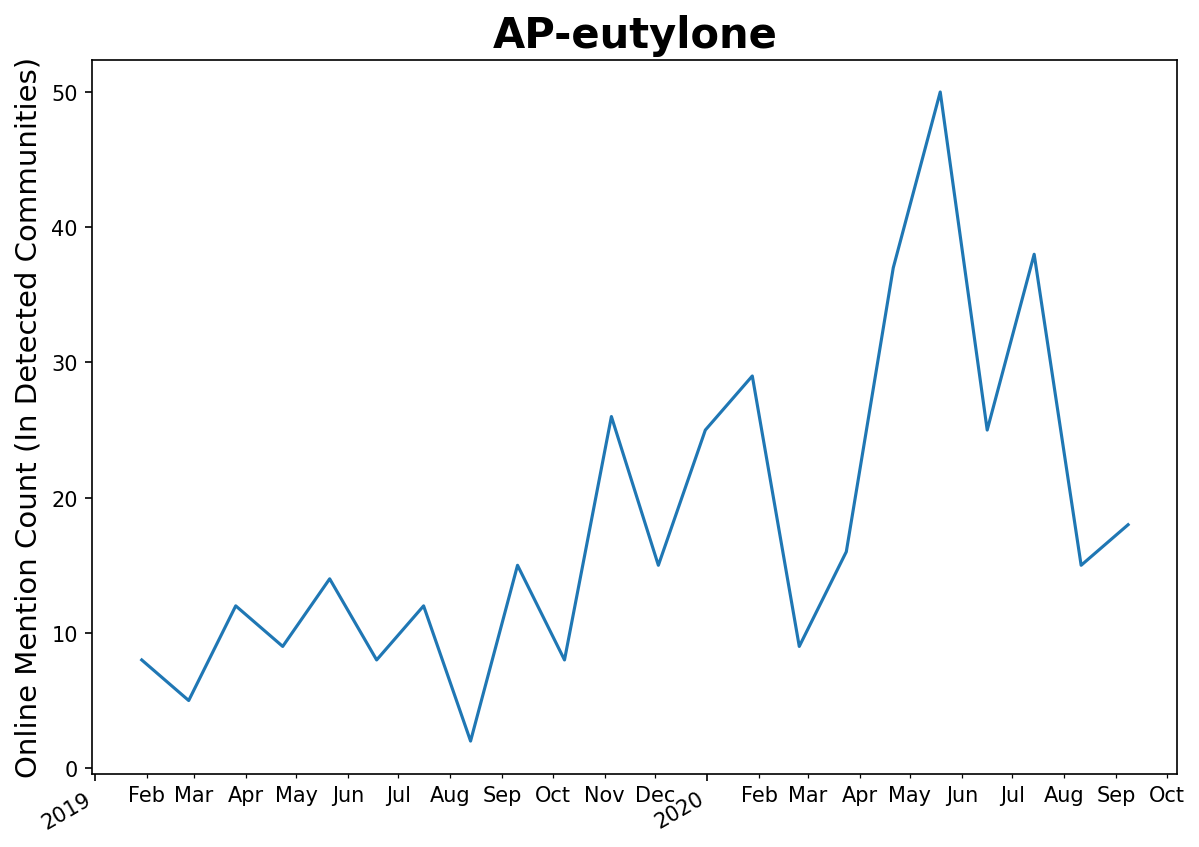

In [110]:
for keyword in data.keys():
    plot_keyword(data[keyword], "AP-"+keyword)